# Perspectives of developers regarding diversity and inclusion.
  Question 2 - Are there differences in responses based on gender, or highest education of parents?
  
  To initiate the data wrangling process, we'll import essential libraries required for our tasks.
  we'll utilize pandas and numpy for data manipulation and processing. Additionally, for creating basic 
  visualizations, matplotlib and seaborn can serve as a valuable asset. 

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv('survey-results-public.csv')
df.head(5)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
2. # Check the number of rows and coloumns 
num_rows = df.shape[0]
num_cols = df.shape[1]
print("The Number of rows:",num_rows,"\nThe number of cols:",num_cols)


The Number of rows: 51392 
The number of cols: 154


In [80]:
# Select relevant columns
columns_question_2 = ['Gender', 'HighestEducationParents', 'DiversityImportant']


In [83]:
nulls_Gender = df['Gender'].isnull().sum()/df.shape[0]
#nulls_Race = df['Race'].isnull().sum()/df.shape[0]
nulls_Highest_Education_Parents= df['HighestEducationParents'].isnull().sum()/df.shape[0]
nulls_Diversity_Important = df['DiversityImportant'].isnull().sum()/df.shape[0]

print(f'Nulls in DiversityImportant: {nulls_Diversity_Important}')
print(f'Nulls in Gender: {nulls_Gender}')
#print(f'Nulls in Race: {nulls_Race}')
print(f'Nulls in HighestEducationParents: {nulls_Highest_Education_Parents}')

Nulls in DiversityImportant: 0.3986807285180573
Nulls in Gender: 0.3180456102117061
Nulls in HighestEducationParents: 0.3201665628891656


In [84]:
# Subset the DataFrame with relevant columns
#df_question_2 = df[columns_question_2].dropna()
df_question_2 = df.fillna(value={'DiversityImportant': 'Unknown', 'Gender':'Unknown','Race':'Unknown','HighestEducationParents': 'Unknown'})

In [85]:
3. # Check the unique values in 'DiversityImportant' and 'AssessJobDiversity'
print("Unique values in 'Gender':",list(df_question_2['Gender'].unique()))

Unique values in 'Gender': ['Male', 'Unknown', 'Female', 'Gender non-conforming', 'Other', 'Male; Gender non-conforming', 'Female; Transgender', 'Male; Female', 'Male; Other', 'Transgender', 'Transgender; Gender non-conforming', 'Female; Gender non-conforming', 'Male; Female; Transgender; Gender non-conforming; Other', 'Male; Female; Transgender', 'Male; Female; Other', 'Male; Female; Transgender; Gender non-conforming', 'Male; Transgender', 'Female; Transgender; Gender non-conforming', 'Gender non-conforming; Other', 'Male; Female; Gender non-conforming', 'Female; Other', 'Male; Transgender; Gender non-conforming', 'Transgender; Other', 'Male; Gender non-conforming; Other', 'Female; Gender non-conforming; Other', 'Male; Female; Gender non-conforming; Other', 'Female; Transgender; Other', 'Female; Transgender; Gender non-conforming; Other', 'Male; Transgender; Other', 'Male; Female; Transgender; Other']


In [86]:
# Group infrequent categories in 'Gender' into 'Other'
infrequent_genders =  ['Gender non-conforming', 'Other', 'Male; Gender non-conforming', 'Male; Female', 
                       'Male; Other', 'Transgender', 'Transgender; Gender non-conforming', 'Female; Transgender', 
                       'Female; Gender non-conforming', 'Male; Female; Transgender; Gender non-conforming', 'Male; Transgender',
                       'Female; Transgender; Gender non-conforming', 'Gender non-conforming; Other', 'Male; Female; Transgender',
                       'Male; Female; Gender non-conforming', 'Female; Other', 'Male; Female; Transgender; Gender non-conforming; Other', 
                       'Male; Transgender; Gender non-conforming', 'Transgender; Other', 'Male; Gender non-conforming; Other',
                       'Male; Female; Gender non-conforming; Other', 'Female; Transgender; Other', 'Female; Transgender; Gender non-conforming; Other',
                       'Male; Female; Other', 'Male; Transgender; Other', 'Male; Female; Transgender; Other']

df_question_2['Gender'] = df_question_2['Gender'].apply(lambda x: 'Other' if x in infrequent_genders else x)


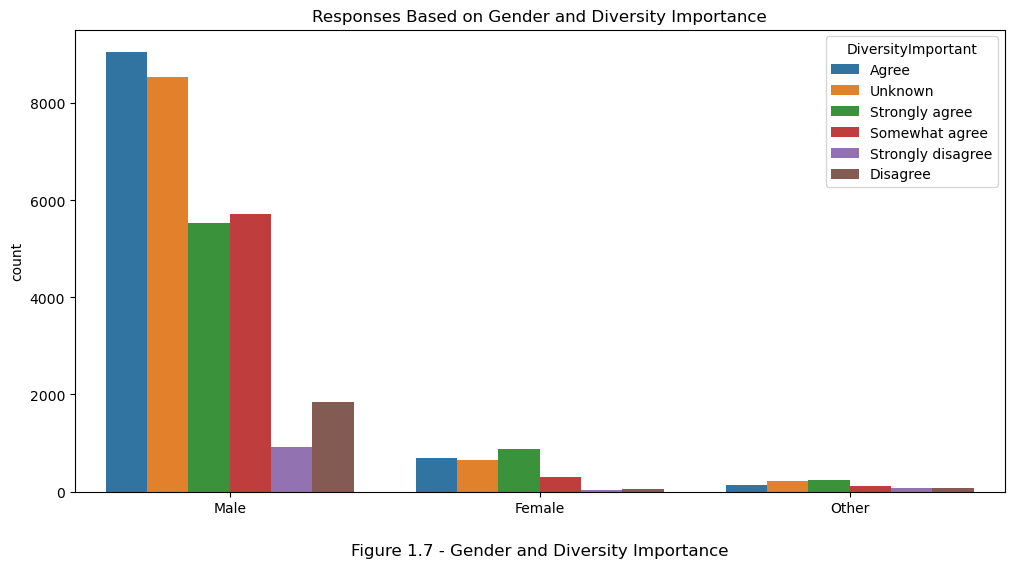

In [88]:
# Visualize differences based on Gender
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='DiversityImportant', data=df_question_2, order=['Male', 'Female', 'Other'])
plt.title('Responses Based on Gender and Diversity Importance')

# Set the x-axis label with the Figure number
plt.xlabel('Figure 1.7 - Gender and Diversity Importance', fontsize=12, labelpad=20)

plt.show()


In [43]:
#Create the contingency table
contingency_table = pd.crosstab(index=df_question_2['Gender'], columns=df_question_2['DiversityImportant'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
DiversityImportant                    Agree  Disagree  Somewhat agree  \
Gender                                                                  
Female                                  688        55             303   
Female; Gender non-conforming; Other      0         0               0   
Male                                   9064      1841            5713   
Other                                   138        68             115   
Unknown                                2121       363            1232   

DiversityImportant                    Strongly agree  Strongly disagree  \
Gender                                                                    
Female                                           881                 23   
Female; Gender non-conforming; Other               0                  0   
Male                                            5523                914   
Other                                            229                 82   
Unknown            

In [91]:
# Check the unique values in 'DiversityImportant' and 'AssessJobDiversity'
print("Unique values in 'HighestEducationParents':",list(df_question_2['HighestEducationParents'].unique()))

Unique values in 'HighestEducationParents': ['High school', "A master's degree", 'A professional degree', 'A doctoral degree', 'Unknown', "A bachelor's degree", "Some college/university study, no bachelor's degree", 'I prefer not to answer', 'Primary/elementary school', "I don't know/not sure", 'No education']


In [92]:
# Replace the long category with a shorter name
df_question_2['HighestEducationParents'] = df_question_2['HighestEducationParents'].replace(
    "Some college/university study, no bachelor's degree", 
    'Some college/no bachelor')

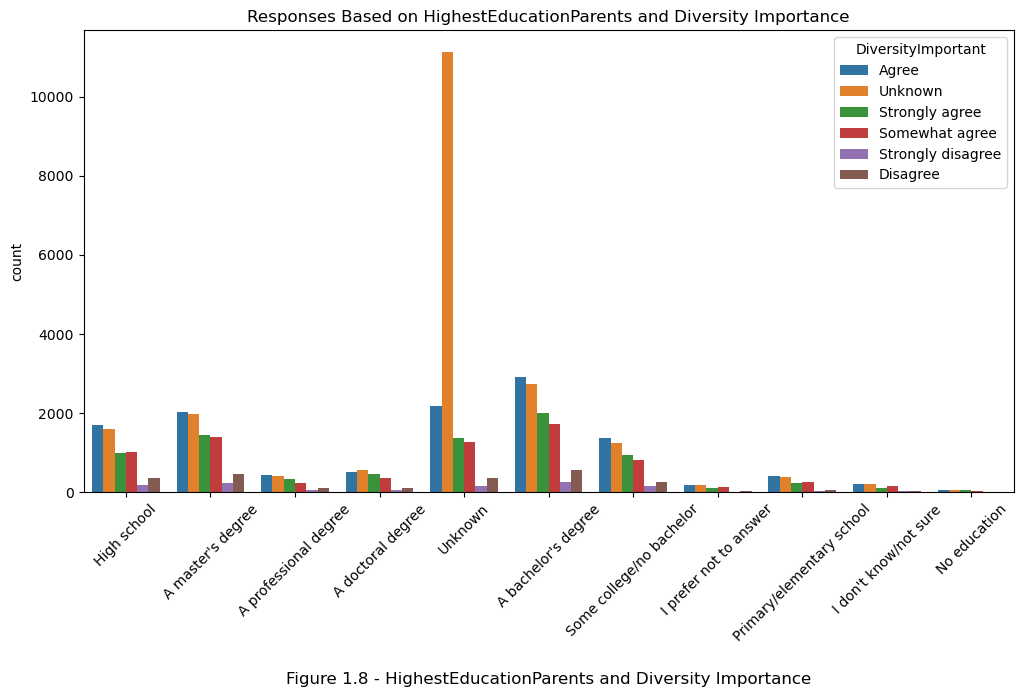

DiversityImportant         Agree  Disagree  Somewhat agree  Strongly agree  \
HighestEducationParents                                                      
A bachelor's degree         2912       552            1718            1993   
A doctoral degree            525       111             354             453   
A master's degree           2034       468            1392            1440   
A professional degree        433        96             233             327   
High school                 1708       352            1022            1003   
I don't know/not sure        211        43             155              98   
I prefer not to answer       172        23             131              97   
No education                  59        10              33              49   
Primary/elementary school    420        51             249             241   
Some college/no bachelor    1360       262             814             942   
Unknown                     2177       359            1262      

In [95]:
# Visualize differences based on Gender
plt.figure(figsize=(12, 6))
sns.countplot(x='HighestEducationParents', hue='DiversityImportant', data=df_question_2)#, order=['Male', 'Female', 'Other'])
plt.title('Responses Based on HighestEducationParents and Diversity Importance')

plt.xticks(rotation=45) 

# Set the x-axis label with the Figure number
plt.xlabel('Figure 1.8 - HighestEducationParents and Diversity Importance', fontsize=12, labelpad=20)

plt.show()

# Compute and print the contingency table
contingency_table = pd.crosstab(df_question_2['HighestEducationParents'], df_question_2['DiversityImportant'])
print(contingency_table)


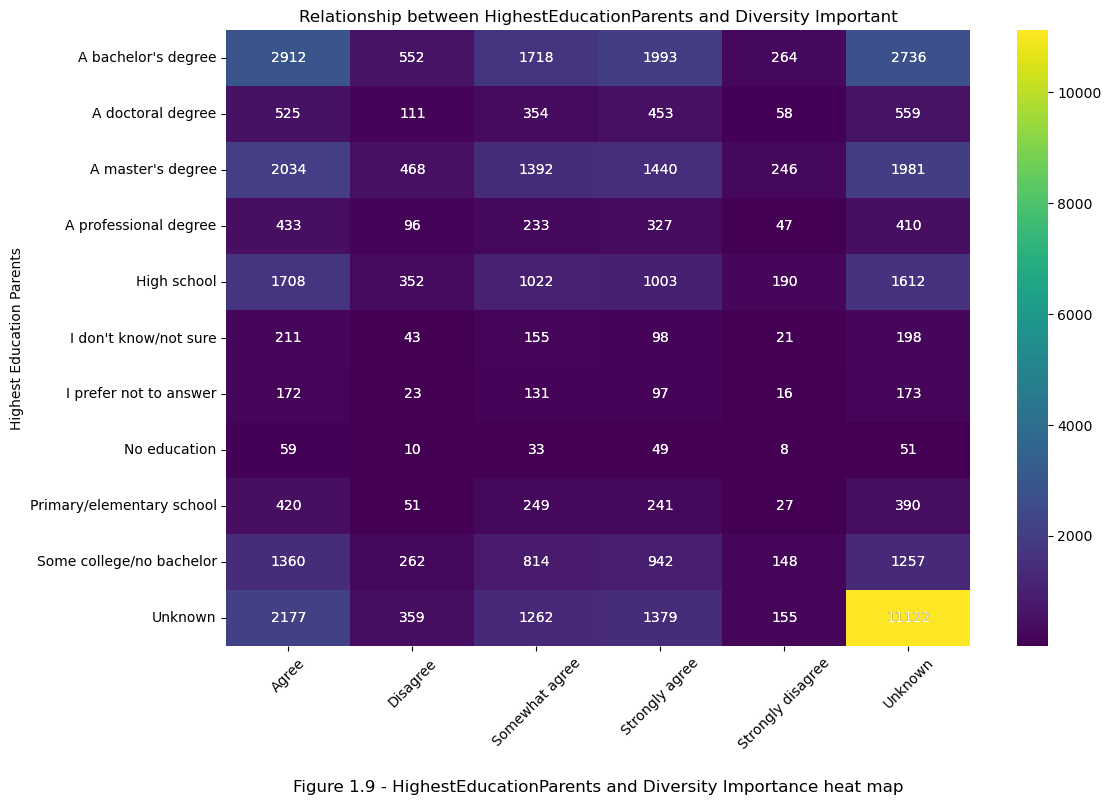

Contingency Table:
DiversityImportant         Agree  Disagree  Somewhat agree  Strongly agree  \
HighestEducationParents                                                      
A bachelor's degree         2912       552            1718            1993   
A doctoral degree            525       111             354             453   
A master's degree           2034       468            1392            1440   
A professional degree        433        96             233             327   
High school                 1708       352            1022            1003   
I don't know/not sure        211        43             155              98   
I prefer not to answer       172        23             131              97   
No education                  59        10              33              49   
Primary/elementary school    420        51             249             241   
Some college/no bachelor    1360       262             814             942   
Unknown                     2177       359   

In [97]:
# Visualize Relationship between HighestEducationParents and Diversity Important
# Create a contingency table
contingency_table = pd.crosstab(df_question_2['HighestEducationParents'], df_question_2['DiversityImportant'])


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='viridis', annot=True, fmt='d')
plt.title('Relationship between HighestEducationParents and Diversity Important')
plt.xlabel('Diversity Important')
plt.ylabel('Highest Education Parents')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add text annotations
for i in range(len(contingency_table)):
    for j in range(len(contingency_table.columns)):
        plt.text(j + 0.5, i + 0.5, f"{contingency_table.iloc[i, j]}", ha='center', va='center', color='white')

# Set the x-axis label with the Figure number
plt.xlabel('Figure 1.9 - HighestEducationParents and Diversity Importance heat map', fontsize=12, labelpad=20)
        
plt.show()

# Print the contingency table
print("Contingency Table:")
print(contingency_table)
print()
